<a href="https://colab.research.google.com/github/rosembergennes/python/blob/master/POSITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregando as BIBLIOTECAS 

In [4]:
!apt update
!apt install chromium-chromedriver
!pip install selenium
!pip install dnspython

import time
from datetime import datetime, timedelta
from selenium import webdriver
import requests
import pandas as pd
from google.colab import files
import os
import numpy as np
from pandas import DataFrame
import pandas as pd
from datetime import timedelta, date ,datetime
from decimal import Decimal
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime
from pymongo import MongoClient
import pprint
import datetime
import json
# Importando numpy
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date ,datetime
pd.options.display.max_columns = None
pd.options.display.max_rows = None


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 2s (138 kB/s)
Reading package lists... Done
Building dependency tree       
Reading s

## OBTENDO DADOS DO ATLAS MONGODB

In [5]:
# obtendo dados do atlas mongodb
client = MongoClient("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
db = client.acoes
collection = db.bolsabrasil
data = pd.DataFrame(list(collection.find()))


In [6]:
# Verificando rapidamente os dados
# data.info()
data.query('CODNEG=="PETR4"').head(7)

,_id,DATPRG,CODBDI,CODNEG,NOMRES,ESPECI,PREABE,PREMAX,PREMIN,PREULT,PREOFC,PREOFV,VOLTOT,VALAF,VALMM,PERCAF,PERCMM,EMPRESA,SETOR,SUBSETOR,VALMERC,VALFIRMA,NUACOES,PL,CRESULT5,VPA,GIROATIVO
259,5f2be5e43427840390ba040d,2020-08-05,2,PETR4,PETROBRAS,PN N2,22.23,23.28,22.23,23.18,23.17,23.18,3.162455e+09,0.95,1.05,4.10,4.51,PETROBRAS PN,"Petróleo, Gás e Biocombustíveis",Exploração e/ou Refino e Distribuição,3.023710e+11,6.923760e+11,1.304450e+10,-8.89,-0.1,18.61,0.27
631,5f2cb7587a17aad30592e720,2020-08-06,2,PETR4,PETROBRAS,PN N2,23.28,23.53,23.01,23.22,23.18,23.22,1.310693e+09,-0.06,0.52,-0.26,2.21,PETROBRAS PN,"Petróleo, Gás e Biocombustíveis",Exploração e/ou Refino e Distribuição,3.028930e+11,6.928980e+11,1.304450e+10,-8.91,-0.1,18.61,0.27
878,5f2e282ca54b9b601f210446,2020-08-07,2,PETR4,PETROBRAS,PN N2,22.86,22.91,22.55,22.79,22.78,22.79,1.271670e+09,-0.07,0.36,-0.31,1.57,PETROBRAS PN,"Petróleo, Gás e Biocombustíveis",Exploração e/ou Refino e Distribuição,2.972840e+11,6.872890e+11,1.304450e+10,-8.74,-0.1,18.61,0.27
1323,5f32275826b1563613ecbf8d,2020-08-10,2,PETR4,PETROBRAS,PN N2,22.90,23.45,22.64,23.45,23.44,23.45,1.208285e+09,0.55,0.81,2.35,3.45,PETROBRAS PN,"Petróleo, Gás e Biocombustíveis",Exploração e/ou Refino e Distribuição,3.058930e+11,6.958980e+11,1.304450e+10,-9.00,-0.1,18.61,0.27
1659,5f3355fcd1c103761bf4915a,2020-08-11,2,PETR4,PETROBRAS,PN N2,23.71,23.88,23.06,23.08,23.08,23.10,1.560843e+09,-0.63,0.82,-2.73,3.43,PETROBRAS PN,"Petróleo, Gás e Biocombustíveis",Exploração e/ou Refino e Distribuição,3.010670e+11,6.910720e+11,1.304450e+10,-8.86,-0.1,18.61,0.27
2054,5f34bd44f3e33edb4b9f69b4,2020-08-12,2,PETR4,PETROBRAS,PN N2,23.36,23.68,23.08,23.48,23.45,23.48,1.565579e+09,0.12,0.60,0.51,2.53,PETROBRAS PN,"Petróleo, Gás e Biocombustíveis",Exploração e/ou Refino e Distribuição,3.062850e+11,6.962900e+11,1.304450e+10,-9.01,-0.1,18.61,0.27
2495,5f3613bb87d60b6036e10721,2020-08-13,2,PETR4,PETROBRAS,PN N2,23.45,23.58,22.71,22.84,22.82,22.84,1.030041e+09,-0.61,0.87,-2.67,3.69,PETROBRAS PN,"Petróleo, Gás e Biocombustíveis",Exploração e/ou Refino e Distribuição,2.979360e+11,6.879410e+11,1.304450e+10,-8.76,-0.1,18.61,0.27


## ANALISANDO NEGOCIAÇÕES POR SETOR

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7248 entries, 0 to 7247
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   _id        7248 non-null   object        
 1   DATPRG     7248 non-null   datetime64[ns]
 2   CODBDI     7248 non-null   int64         
 3   CODNEG     7248 non-null   object        
 4   NOMRES     7248 non-null   object        
 5   ESPECI     7248 non-null   object        
 6   PREABE     7248 non-null   float64       
 7   PREMAX     7248 non-null   float64       
 8   PREMIN     7248 non-null   float64       
 9   PREULT     7248 non-null   float64       
 10  PREOFC     7248 non-null   float64       
 11  PREOFV     7248 non-null   float64       
 12  VOLTOT     7248 non-null   float64       
 13  VALAF      7248 non-null   float64       
 14  VALMM      7248 non-null   float64       
 15  PERCAF     7248 non-null   float64       
 16  PERCMM     7248 non-null   float64       


In [8]:
# São definidos os seguintes setores de negociação na bolsa de valores.
data['SETOR'].unique()

array(['Saúde', 'Energia Elétrica', 'Serviços', 'Construção e Engenharia',
       'Hoteis e Restaurantes', 'Financeiros', 'Máquinas e Equipamentos',
       'Tecidos, Vestuário e Calçados', 'Previdência e Seguros',
       'Holdings Diversificadas', 'Água e Saneamento',
       'Exploração de Imóveis', 'Comércio', 'Mineração',
       'Serviços Financeiros Diversos', 'Alimentos', 'Viagens e Lazer',
       'Transporte', 'Bebidas', 'Diversos', 'Outros',
       'Prods. de Uso Pessoal e de Limpeza',
       'Petróleo, Gás e Biocombustíveis', 'Químicos', nan, 'Agropecuária',
       'Siderurgia e Metalurgia', 'Madeira e Papel',
       'Programas e Serviços', 'Comércio e Distribuição',
       'Telefonia Fixa', 'Computadores e Equipamentos', 'Mídia', 'Gás',
       'Material de Transporte', 'Utilidades Domésticas',
       'Telefonia Móvel', '', 'Equipamentos Elétricos', 'Embalagens'],
      dtype=object)

In [9]:
# Funcoes Matematicas.
# Soma dos valores de um DataFrame >> df.sum()
# Menor valor de um DataFrame >> df.min()
# Maior valor >> df.max()
# Média dos valores   >> df.mean()
# Mediana dos valores >> df.median()

# Utilizando sum by group sobre a Column *PERCAF obteremos o ranque dos setores
# *PERCAF ( percentual Abertura / Fechamento)

# Para manter as colunas originais 'SETOR','PERCAF', usaremos reset_index(). 
# Caso contrário, 'SETOR'  tornará parte do índice.

df_analise_setor=data.groupby(['SETOR'])['PERCAF'].sum().reset_index()
df_analise_setor.head(8)

,SETOR,PERCAF
0,,4.54
1,Agropecuária,-6.13
2,Alimentos,-30.30
3,Bebidas,-9.62
4,Computadores e Equipamentos,-5.33
5,Comércio,10.75
6,Comércio e Distribuição,-63.63
7,Construção e Engenharia,-382.37


In [10]:
# MENORES RENTABILIDADES PERCENTUALMENTE
df_analise_setor_menor_rentabilidade= df_analise_setor.sort_values("PERCAF",ascending=True)
df_analise_setor_menor_rentabilidade.head(7)

,SETOR,PERCAF
7,Construção e Engenharia,-382.37
10,Energia Elétrica,-339.34
13,Financeiros,-277.73
22,Outros,-125.84
18,Material de Transporte,-119.34
12,Exploração de Imóveis,-112.26
32,"Tecidos, Vestuário e Calçados",-111.06


In [11]:
# MAIOR RENTABILIDADES PERCENTUALMENTE
df_analise_setor_maior_rentabilidade= df_analise_setor.sort_values("PERCAF",ascending=False)
df_analise_setor_maior_rentabilidade.head(7)

,SETOR,PERCAF
15,Holdings Diversificadas,101.74
26,Programas e Serviços,34.36
31,Siderurgia e Metalurgia,30.68
17,Madeira e Papel,28.21
20,Máquinas e Equipamentos,26.63
14,Gás,15.72
5,Comércio,10.75


## GERANDO GRAFICOS PERCENTUAL POR SETOR

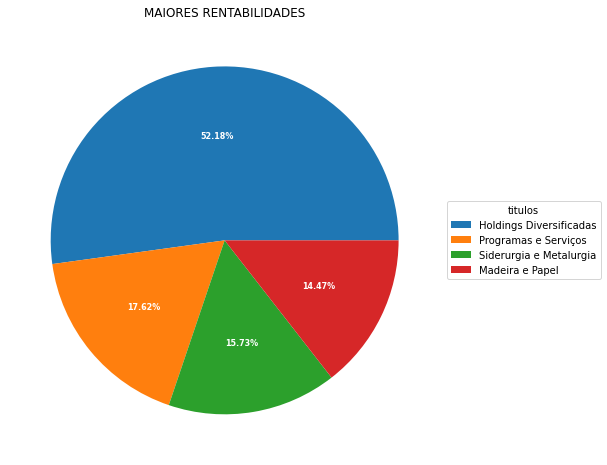

In [12]:
# Area de plotagem do Grafico definindo o tamanho figsize=(8,8)
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))

# Matriz dos dados (valores,titulos)
valores =  df_analise_setor_maior_rentabilidade["PERCAF"].head(4)
titulos =  df_analise_setor_maior_rentabilidade["SETOR"].head(4)

# Calculo para porcentagem dentro do grafico
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%".format(pct, absolute)

# Criando o grafico e acertando as legendas
wedges, texts, autotexts = ax.pie(valores, autopct=lambda pct: func(pct, valores),
                                  textprops=dict(color="w"))

ax.legend(wedges, titulos,
          title="titulos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("MAIORES RENTABILIDADES")

plt.show()

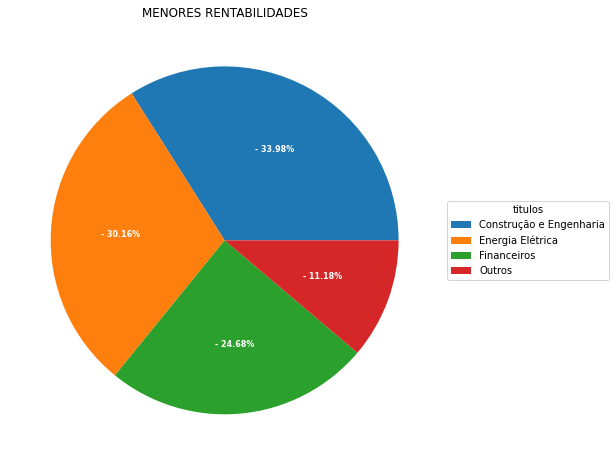

In [13]:
# Area de plotagem do Grafico definindo o tamanho figsize=(8,8)
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))

# Matriz dos dados (valores,titulos)
# <<< COMO VALORES SÃO NEGATIVOS TRANSFORMO EM POSSITIVO >>>
# <<< E PARA NÃO FICAR DUVIDA COLOCO UM - NO LABEL DO RETURN >>>
valores =  abs(df_analise_setor_menor_rentabilidade["PERCAF"]).head(4)
titulos =  df_analise_setor_menor_rentabilidade["SETOR"].head(4)

# Calculo para porcentagem dentro do grafico 
# <<<< COMO OS VALORES SÃO NEGATIVO return"-  >>>>
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "- {:.2f}%".format(pct, absolute)

# Criando o grafico e acertando as legendas
wedges, texts, autotexts = ax.pie(valores, autopct=lambda pct: func(pct, valores),
                                  textprops=dict(color="w"))

ax.legend(wedges, titulos,
          title="titulos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("MENORES RENTABILIDADES")

plt.show()

## ANALISANDO MELHORES EMPRESAS PARA INVESTIMENTO A LONGO PRAZO ( ainda não acabei )

In [14]:
data.head()

,_id,DATPRG,CODBDI,CODNEG,NOMRES,ESPECI,PREABE,PREMAX,PREMIN,PREULT,PREOFC,PREOFV,VOLTOT,VALAF,VALMM,PERCAF,PERCMM,EMPRESA,SETOR,SUBSETOR,VALMERC,VALFIRMA,NUACOES,PL,CRESULT5,VPA,GIROATIVO
0,5f2be5e43427840390ba032a,2020-08-05,2,AALR3,ALLIAR,ON NM,11.07,11.12,10.69,10.72,10.72,10.73,8011134.0,-0.35,0.43,-3.26,3.87,ALLIAR ON NM,Saúde,"Serviços Médico - Hospitalares, Análises e Dia...",1.268100e+09,1.835620e+09,118293000.0,130.28,0.9,10.68,0.40
1,5f2be5e43427840390ba0336,2020-08-05,2,ALUP11,ALUPAR,UNT N2,24.10,24.23,23.94,24.19,24.19,24.20,25051431.0,0.09,0.29,0.37,1.20,ALUPAR UNT N2,Energia Elétrica,Energia Elétrica,7.088560e+09,1.230160e+10,879111000.0,10.60,32.5,17.77,0.23
2,5f2be5e43427840390ba0332,2020-08-05,2,ALPK3,ESTAPAR,ON NM,9.65,9.65,9.40,9.42,9.41,9.56,475608.0,-0.23,0.25,-2.44,2.59,ESTAPAR ON NM,Serviços,Serviços Diversos,1.825320e+09,3.322910e+09,193771000.0,0.00,0.0,2.82,0.00
3,5f2be5e43427840390ba033f,2020-08-05,2,AZEV4,AZEVEDO,PN,4.05,4.30,4.00,4.20,4.20,4.25,66449.0,0.15,0.30,3.57,6.98,AZEVEDO & TRAVASSOS PN,Construção e Engenharia,Construção Pesada,2.268000e+07,5.668700e+07,5400000.0,0.30,-49.4,-46.10,-0.82
4,5f2be5e43427840390ba0349,2020-08-05,2,BBRK3,BR BROKERS,ON NM,2.25,2.30,2.17,2.30,2.30,2.31,1168166.0,0.05,0.13,2.17,5.65,BR Brokers ON NM,Construção e Engenharia,Intermediação Imobiliária,8.344010e+07,3.510010e+07,36278300.0,-0.55,2.2,4.59,0.38


In [ ]:
# Preço da ação dividido pelo lucro por ação. 
# O P/L é o número de anos que se levaria para reaver o capital aplicado na compra de uma ação,
# através do recebimento do lucro gerado pela empresa, considerando que esses lucros permaneçam constantes.